
#**TOKENIZATION**

##Introduction


Welcome to my GitHub post on Tokenization using the BBC articles full-text and category dataset from Kaggle. 

In this project, I have explored the process of tokenization and its application in text classification using a popular dataset. Tokenization plays a crucial role in natural language processing tasks by breaking down text into smaller units, such as words or subwords, allowing us to extract meaningful information and perform various analyses.

The dataset I utilized contains a collection of articles from different categories, including sport, business, politics, tech, and entertainment. By leveraging tokenization techniques and employing a deep learning model, specifically an LSTM (Long Short-Term Memory) network, I aimed to classify the articles accurately into their respective categories.

Throughout this project, I have utilized Python and various libraries such as pandas, scikit-learn, TensorFlow, and Keras. The code provided here demonstrates the step-by-step implementation of tokenization, data preprocessing, model building, and training. Additionally, I have included visualizations to help us gain insights into the model's performance.

By sharing this project on GitHub, I hope to provide a valuable resource for those interested in understanding and implementing tokenization techniques in text classification tasks. Whether you are a beginner or have some prior experience in natural language processing, this project can serve as a practical guide to grasp the fundamentals of tokenization and its application using real-world data.

Feel free to explore the code, experiment with different parameters, and adapt it to your own projects. I encourage you to engage in discussions and provide feedback for further improvements. Let's dive into the world of tokenization and uncover the power of text analysis!

Note: 

To run the code successfully, please ensure that you have the necessary dependencies installed and have downloaded the BBC articles full-text and category dataset from Kaggle.

Happy coding!

###Importing Libraries and Loading the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/bbc-text.csv')

We begin by importing the necessary libraries, pandas, and reading the dataset from the 'bbc-text.csv' file.

###Checking Value Counts of Categories

In [ ]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

We check the count of each category in the dataset's 'category' column. This helps us understand the distribution of categories in the data.

###One-Hot Encoding the Categories

In [ ]:
category = pd.get_dummies(df.category)
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='category')
df_new 

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


To prepare the data for machine learning algorithms, we perform one-hot encoding on the 'category' column. This creates separate binary columns for each category. The encoded categories are then concatenated with the original dataframe, and the 'category' column is dropped.

###Text and Label Data Extraction

In [ ]:
Text = df_new['text'].values
label = df_new[['sport', 'business', 'politics', 'tech', 'entertainment']].values

By extracting the text and label data from the dataframe, we are separating the input features (text) and the corresponding output labels (categories) into separate variables. This separation enables us to feed the text data into the tokenization and modeling processes, while the label data is used to train and evaluate the classification model accurately.

###Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
Text_latih, Text_test, label_latih, label_test = train_test_split(Text, label, test_size=0.2)

Let's splitting the text data ('Text') and labels ('label') into training and testing sets. It utilizes the train_test_split function from the scikit-learn library. By specifying test_size=0.2, we set the testing set to be 20% of the total data, while the remaining 80% is used for training. This step is essential in evaluating the model's performance on unseen data and preventing overfitting.

###Tokenizing and Padding the Text Data

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(Text_latih) 
tokenizer.fit_on_texts(Text_test)
 
sekuens_latih = tokenizer.texts_to_sequences(Text_latih)
sekuens_test = tokenizer.texts_to_sequences(Text_test)
 
padded_latih = pad_sequences(sekuens_latih,
padding='post',
maxlen=200,
truncating='post')
padded_test = pad_sequences(sekuens_test,
padding='post',
maxlen=200,
truncating='post')

To process the text data for the LSTM model, we use the Tokenizer class from Keras. The text is tokenized, assigning a unique integer index to each word in the vocabulary. The sequences are then padded to have a fixed length of 200 using the pad_sequences function.

###Building the LSTM Model

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

We define a sequential model using Keras. The model architecture consists of an embedding layer, LSTM layer, and several fully connected (Dense) layers. The model is compiled with the categorical_crossentropy loss function, Adam optimizer, and accuracy metric.

###Defining a Custom Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

We define a custom callback class that checks the accuracy after each epoch. If the accuracy surpasses 90%, it prints a message and stops the training process.

###Training the Model

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
56/56 - 12s - loss: 1.5878 - accuracy: 0.2579 - val_loss: 1.5662 - val_accuracy: 0.2135 - 12s/epoch - 216ms/step
Epoch 2/30
56/56 - 7s - loss: 1.3205 - accuracy: 0.4343 - val_loss: 1.1137 - val_accuracy: 0.5011 - 7s/epoch - 128ms/step
Epoch 3/30
56/56 - 8s - loss: 0.8268 - accuracy: 0.6382 - val_loss: 0.8345 - val_accuracy: 0.6742 - 8s/epoch - 145ms/step
Epoch 4/30
56/56 - 7s - loss: 0.6222 - accuracy: 0.7888 - val_loss: 0.8214 - val_accuracy: 0.6831 - 7s/epoch - 131ms/step
Epoch 5/30

Akurasi telah mencapai >90%!
56/56 - 8s - loss: 0.2392 - accuracy: 0.9303 - val_loss: 0.8274 - val_accuracy: 0.7506 - 8s/epoch - 140ms/step


We train the model using the fit method, passing the padded training data, labels, number of epochs, and the defined callback. The model's performance is evaluated on the validation data (padded_test, label_test).

###Plotting the Loss and Accuracy

We plot the model's training loss and accuracy over epochs using matplotlib. The loss plot helps visualize how the model's loss decreases over training, while the accuracy plot shows the improvement in accuracy.

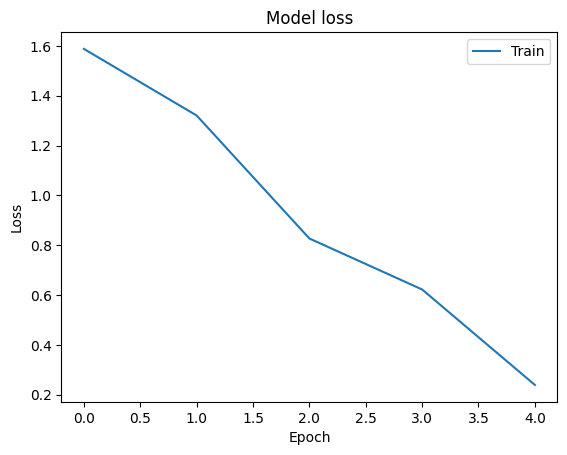

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

The model loss plot, which shows the value of the loss function over epochs, demonstrates how well the model is fitting the training data. As the epochs progress, the loss value decreases, indicating that the model is gradually minimizing the errors between its predicted outputs and the actual labels. This decreasing trend suggests that the model is learning and becoming more effective in capturing the underlying patterns in the data.

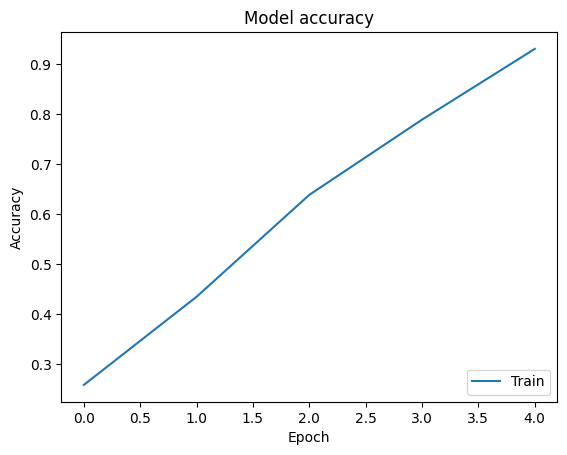

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

On the other hand, the model accuracy plot illustrates the percentage of correctly classified instances by the model over epochs. As the epochs increase, the accuracy value rises, indicating that the model's predictive performance on both the training and validation sets is improving. This increasing trend implies that the model is becoming more accurate in predicting the correct categories for the BBC articles.

Dataset Information:
#BBC articles fulltext and category
Source: https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category